# Iris Metrics 
### Utilizando o dataset 'Iris' da biblioteca sklearn para criar um modelo de classificação utilizando Random Forest e calcular a curva ROC, AUC e exibir os valores de SHAP.

In [11]:
# importando as bibliotecas necessarias 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import shap

In [72]:
# carregando o dataset 
iris = load_iris()
X = iris.data
y = iris.target

In [73]:
# dividindo os dados em conjuntos de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

In [74]:
# preprocessamento e padronização dos dados 
scaler = StandardScaler()
X_treino = scaler.fit_transform(X_treino)
X_teste = scaler.transform(X_teste)

In [75]:
# criando o modelo usando Random Froest 
modelo = RandomForestClassifier(n_estimators=100, random_state=42)

# treinando o modelo 
modelo.fit(X_treino, y_treino)

RandomForestClassifier(random_state=42)

In [76]:
# obtendo as previsoes para o conunto de treino e de teste 
y_treino_prev = modelo.predict_proba(X_treino)
y_teste_prev = modelo.predict_proba(X_teste)

### Calculando a curva ROC para cada classe no conjunto de treino e teste 

In [77]:
n_classes = len(np.unique(y))  # Obtendo as classes do dataset

# variaveis para os dados do conjunto de treino
tfp_treino = dict()  # armazena a taxa de falsos positivos
tvp_treino = dict()  # armazena a taxa de verdadeiros positivos
AUC_treino = dict() 


# variaveis para os dados do conjunto de teste
tfp_teste = dict()  # armazena a taxa de falsos positivos
tvp_teste = dict()  # armazena a taxa de verdadeiros positivos 
AUC_teste = dict()

for i in range(n_classes):
    # conjunto de treino
    tfp_treino[i], tvp_treino[i], _ = roc_curve(y_treino == i, y_treino_prev[:, i])
    AUC_treino[i] = auc(tfp_treino[i], tvp_treino[i])
    
    # conjunto de teste
    tfp_teste[i], tvp_teste[i], _ = roc_curve(y_teste == i, y_teste_prev[:, i])
    AUC_teste[i] = auc(tfp_teste[i], tvp_teste[i])

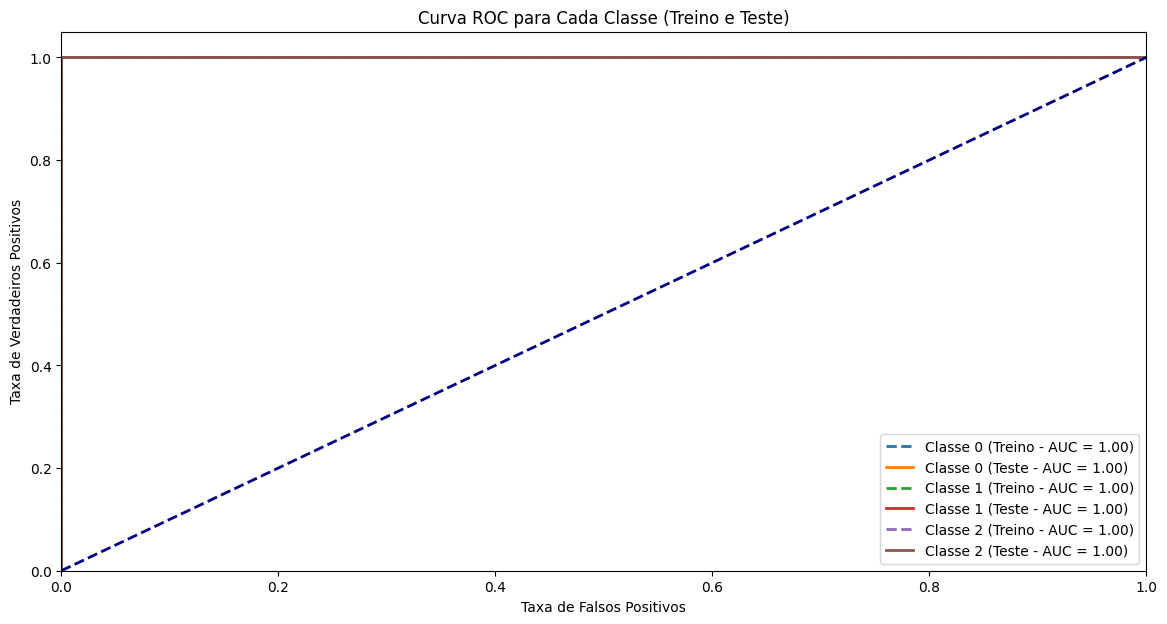

In [78]:
# exibindo a curva ROC para cada classe
plt.figure(figsize=(14, 7))
for i in range(n_classes):
    plt.plot(tfp_treino[i], tvp_treino[i], lw=2, linestyle='--', label=f'Classe {i} (Treino - AUC = {AUC_treino[i]:.2f})') # exibindo a AUC para os dados de treino 
    plt.plot(tfp_teste[i], tvp_teste[i], lw=2, label=f'Classe {i} (Teste - AUC = {AUC_teste[i]:.2f})') # exibindo a AUC para os dados de teste 

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Cada Classe (Treino e Teste)')
plt.legend(loc='lower right')
plt.show()

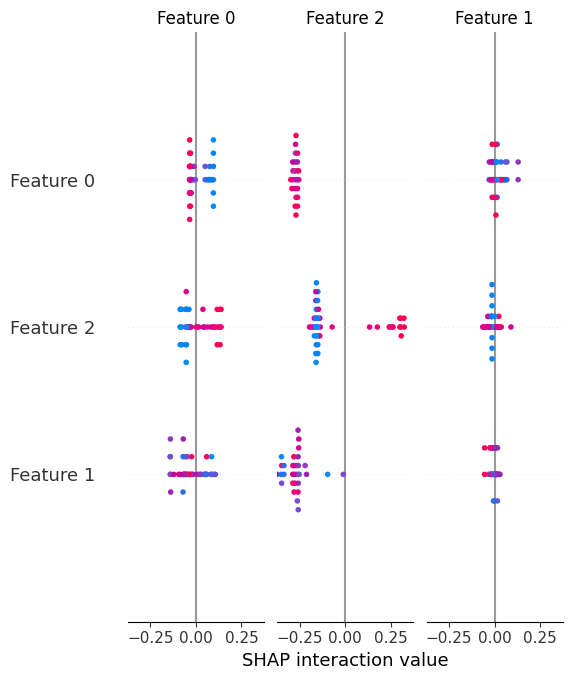

In [79]:
# Calcular e exibir os valores SHAP
explainer = shap.TreeExplainer(modelo)
valores_SHAP = explainer.shap_values(X_teste)
shap.summary_plot(valores_SHAP, X_teste, plot_type="dot")